<a href="https://www.kaggle.com/code/aitesam/eda-book-sale?scriptVersionId=148265383" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 2.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv


In [3]:
books_data = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')
books_data.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


**Goals to Achieve**

* What is the best-selling book?
* Visualize order status frequency
* Find a correlation between date and time with order status
* Find a correlation between city and order status¶
* Find any hidden patterns that are counter-intuitive for a layman
* Can we predict number of orders, or book names in advance?

**Data Exploration**

In [4]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [5]:
books_data.describe()

,Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


Figuring out the maximum value in total items. Let's see what is in there.

In [6]:
books_data[books_data['Total items']== 80022]

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
15981,66499,Returned,انٹرنیٹ سے پیسہ کمائیں,12/27/2020 1:37,City,EasyPaisa,80022,200.0


This entry doesn't seem valid. So, dropping it.

In [7]:
books_data=books_data.drop(15981) #index number 15981

In [8]:
books_data.describe()

,Order Number,Total items,Total weight (grams)
count,19238.000000,19238.000000,19238.000000
mean,52535.054424,1.892608,363.758187
std,15835.852717,5.754468,834.118169
min,307.000000,0.000000,200.000000
25%,48064.250000,1.000000,200.000000
50%,56435.500000,1.000000,200.000000
75%,63778.750000,1.000000,500.000000
max,71420.000000,440.000000,55000.000000


Now it looks good. Let's move on

Lets look at the uniqueness of data

In [9]:
books_data.nunique()

Order Number            19238
Order Status                3
Book Name                3525
Order Date & Time       18099
City                     4163
Payment Method              5
Total items                50
Total weight (grams)       63
dtype: int64

In [10]:
books_data['Order Status'].value_counts()

Order Status
Completed    17948
Returned      1141
Cancelled      149
Name: count, dtype: int64

Let's break down the date into Day, Month and Year.
First of all we need to convert the particular column to Date and Time data type.

In [11]:
books_data['Order Date & Time']=pd.to_datetime(books_data['Order Date & Time'])

In [12]:
books_data['Year']=books_data['Order Date & Time'].dt.strftime('%Y')

In [13]:
books_data['Month']=books_data['Order Date & Time'].dt.strftime('%B')

In [14]:
books_data['Day']=books_data['Order Date & Time'].dt.strftime('%a')

In [15]:
books_data.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Year,Month,Day
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,NaN,2,200.0,2019,October,Thu
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019,October,Thu
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,2019,October,Thu
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019,October,Thu
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,2019,October,Thu


Now let's move on to cities.

In [16]:
books_data['City'].value_counts()

City
Karachi                                                                       2332
Lahore                                                                        1993
Islamabad                                                                      859
Rawalpindi                                                                     645
Faisalabad                                                                     478
                                                                              ... 
Distt.Rahim Yar Khan                                                             1
MAJID IQBAL SATTI PLOT # 150, SECTOR # 23 KORANGI INDUATRIAL AREA KARACHI.       1
Gulberg 3 Lahore                                                                 1
Sadat Pur Rehlein P /O Retra                                                     1
Mailsi, district Vehari                                                          1
Name: count, Length: 4163, dtype: int64

oohh.. There's too much clutter out there. To be on safer side, copying the current dataframe.

In [17]:
org_books_data = books_data.copy()

In [18]:
org_books_data.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Year,Month,Day
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,NaN,2,200.0,2019,October,Thu
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019,October,Thu
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,2019,October,Thu
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019,October,Thu
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,2019,October,Thu


In [19]:
books_data['City'].isna().value_counts()

City
False    19237
True         1
Name: count, dtype: int64

In [20]:
books_data['City'].fillna('Unknown',inplace=True) #inplace=True to update the dataframe

In [21]:
import re

# Defining a function to remove non-alphabet characters
def remove_non_alphabet(input_str):
    return re.sub(r'[^a-zA-Z ]', ' ', input_str)

# Apply the function to the "City" column
books_data["City"] = books_data["City"].apply(remove_non_alphabet)

In [22]:
cities = [
    "karachi", "lahore", "multan", "faisalabad", "islamabad", "rawalpindi", "sialkot",
    "kashmir", "jacobabad", "mianwali", "nawabshah", "sargodha", "quetta", "peshawar", 
    "gujranwala", "bahawalpur", "sukkur", "sheikhupura", "rahimyar khan", "jhang", 
    "gujrat", "sahiwal", "attock", "dera ismail khan", "muzaffarabad", "mirpur", 
    "kohat", "saddar", "bannu", "kamoke", "mandi bahauddin", "wah", "dera ghazi khan", 
    "kasur", "okara", "chiniot", "kandhkot", "khuzdar", "daska", "dera murad jamali", 
    "gujar khan", "mardan", "chaman", "jalalpur", "hafizabad", "sadiqabad", 
    "burewala", "jacobabad", "sialkot", "sukkur", "rohri", "jhelum", "ahmedpur east", 
    "kamalia", "hyderabad", "nawabshah", "dadu", "larkana", "khairpur", "jacobabad", 
    "sukkur", "peshawar", "abbottabad", "mardan", "bannu", "swabi", "nowshera", 
    "charsadda", "muzaffargarh", "layyah", "dera ghazi khan", "bahawalnagar", 
    "bhakkar", "sahiwal", "bahawalpur", "jhang", "toba tek singh", "chiniot", 
    "rahimyar khan", "sukkur", "larkana", "shikarpur", "jacobabad", "khairpur", 
    "sadiqabad", "mirpur khas", "umpire", "gawadar", "qalat", "khuzdar", 
    "gakuch", "skardu", "gilgit", "hunza", "nagar", "abbottabad", "mansehra", 
    "haripur", "batagram", "karak", "kohat", "bannu", "dera ismail khan", "tank", 
    "peshawar", "nowshera", "charsadda", "mardan", "swabi", "abbottabad", "hazara", 
    "rawalakot", "muzaffarabad", "mirpur", "bhimber", "ajk", "sanghar", "swat", "ghotki", "chitral",
    "taxila", "malakand", "chakwal", "rahim yar khan", "toba tek singh", "dera ghazi khan", "mingora",
    "abu dhabi", "dubai", "riyadh"
    
]

In [23]:
for city_in_df in books_data["City"]:
    str_list = city_in_df.lower().split()
    for city_str in str_list: 
        for city in cities:
            if city_str in city:
                books_data.loc[books_data["City"] == city_in_df, "City"] = city

In [24]:
books_data['City'].value_counts()

City
karachi                                      2999
lahore                                       2413
islamabad                                    1000
rawalpindi                                    842
faisalabad                                    722
                                             ... 
adeel town chack       bhaiwala Faisalabd       1
Alpurai                                         1
Jampur Distt Rajanpur                           1
Sukehki                                         1
Mailsi  district Vehari                         1
Name: count, Length: 1729, dtype: int64

Successfully cleaned most of the data in City column as this column contain some values with complete addresses. Using regular expressions and then splitting the string into multiple substrings. Then, we matched the each substring with our city names imported. When a substring matches to our data in cities list, we returned the city name insted of the whole address. Although, its not the best approach but it is what it is. You can use vectorized approach for faster performance.

In [25]:
books_data['Payment Method'].value_counts()

Payment Method
Cash on delivery          17470
EasyPaisa                   696
JazzCash                    596
BankTransfer                459
Cash on Delivery (COD)        7
Name: count, dtype: int64

There's consistency issue in data. Cash on delivery and Cash on Delivery (COD) are same. Let's make the data consistent. The above output is after replacing the values.

In [26]:
books_data['Payment Method']=books_data['Payment Method'].replace({'Cash on delivery':'COD','Cash on Delivery (COD)':'COD'})

There are some values missing in payment method. Let's assume that they are COD and fill those values.

In [27]:
books_data['Payment Method'].fillna('COD',inplace=True)

In [28]:
books_data['Payment Method'].unique()

array(['COD', 'EasyPaisa', 'JazzCash', 'BankTransfer'], dtype=object)

In [29]:
books_data['Book Name'].fillna('Unknown',inplace=True)

In [30]:
def split_booknames(df_to_split):

    order_num = []
    book_name = []
    status=[]

    for i, book in enumerate(df_to_split["Book Name"]):
        bookNames = book.split('/')
        for each_book in bookNames:
            order_num.append(df_to_split.iloc[i]["Order Number"])
            book_name.append(each_book)
            status.append(df_to_split.iloc[i]['Order Status'])

    book_df = pd.DataFrame(data=[order_num, book_name, status]).transpose()
    book_df.columns = ["Order Number", "Book Name", 'Order Status']
    
    return book_df

In [31]:
book_df = split_booknames(books_data)
book_df.head(10)

,Order Number,Book Name,Order Status
0,307,Bitcoin Blockchain aur Crypto Currency - FREE ...,Completed
1,308,Kaggle for Begginers,Completed
2,309,Kaggle for Begginers,Completed
3,309,Bitcoin Blockchain aur Crypto Currency - FREE ...,Completed
4,310,Kaggle for Begginers,Cancelled
5,311,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Completed
6,312,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Completed
7,312,Kaggle for Begginers,Completed
8,312,(C++) ++سی,Completed
9,312,سی,Completed


Here we have splitted the book names from each order and assigned it in a new dataframe so that our original dataset remains same. We'lluse this dataframe for further analysis.

In [32]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19238 entries, 0 to 19238
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Number          19238 non-null  int64         
 1   Order Status          19238 non-null  object        
 2   Book Name             19238 non-null  object        
 3   Order Date & Time     19238 non-null  datetime64[ns]
 4   City                  19238 non-null  object        
 5   Payment Method        19238 non-null  object        
 6   Total items           19238 non-null  int64         
 7   Total weight (grams)  19238 non-null  float64       
 8   Year                  19238 non-null  object        
 9   Month                 19238 non-null  object        
 10  Day                   19238 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.8+ MB


Successfully completed the Data Exploration and Data Cleaning. Let's move on to the next step.

**Data Analysis**

First of all let's see the top selling books.

In [33]:
top_selling_books=book_df['Book Name'].value_counts(ascending=False).reset_index().head(5)

In [34]:
top_selling_books

,Book Name,count
0,انٹرنیٹ سے پیسہ کمائیں,3506
1,Python Programming,2413
2,Artificial Intelligence,2105
3,"Blockchain, Cryptocurrency And Bitcoin",1906
4,Product Management,1553


Text(0, 0.5, 'Book Names')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH G

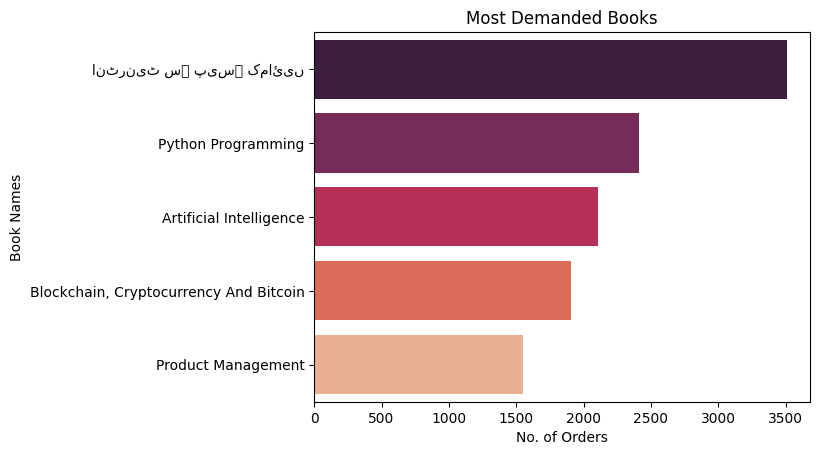

In [35]:
sns.barplot(data=top_selling_books, x='count', y='Book Name',palette='rocket')
plt.title("Most Demanded Books")
plt.xlabel("No. of Orders")
plt.ylabel("Book Names")

So, basically there's an issue with the language urdu in seaborn library which is the reason why we are not able to get the correct name of our top selling book.

The graph shows us that the book named **"انٹرنیٹ سے پیسہ کمائیں"** is the top selling book with orders exceeding 3500.

Now, let's have a look at order status.

In [36]:
books_data['Order Status'].value_counts().reset_index()

,Order Status,count
0,Completed,17948
1,Returned,1141
2,Cancelled,149


In [37]:
order_percentage=((books_data['Order Status'].value_counts()/books_data['Order Status'].shape[0])*100).reset_index()

Here shape[0] is to get the count of all the entries in Order Status column.

In [38]:
order_percentage

,Order Status,count
0,Completed,93.294521
1,Returned,5.930970
2,Cancelled,0.774509


Text(0.5, 1.0, 'Order Status Frequency')

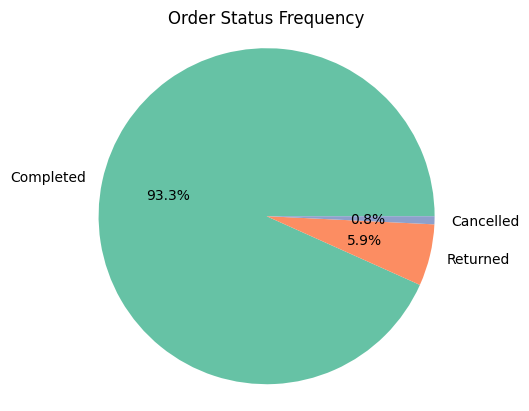

In [39]:
plt.pie(order_percentage['count'], labels=order_percentage['Order Status'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.axis("equal")
plt.title("Order Status Frequency")

The Book store is going well. 93.3% order completion rate.

Now, lets find out which month has highest sales

In [40]:
books_data.groupby('Month')['Order Status'].value_counts()

Month      Order Status
April      Completed        152
August     Completed       2292
           Returned         116
           Cancelled         37
December   Completed       2541
           Returned         237
           Cancelled         24
February   Completed         59
January    Completed       3199
           Returned         199
           Cancelled         15
July       Completed       1240
           Cancelled         62
           Returned           3
June       Completed       1114
           Cancelled          7
March      Completed         82
May        Completed       1488
           Cancelled          2
November   Completed       2456
           Returned         281
           Cancelled          1
October    Completed       1895
           Returned         195
           Cancelled          1
September  Completed       1430
           Returned         110
Name: count, dtype: int64

let's clean it up so we can easily understand the trend.

In [41]:
result=books_data[books_data['Order Status']== 'Completed'].groupby('Month')['Order Status'].count()

In [42]:
monthly_sales=result.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

The above step was done to sort data by month order.

In [43]:
monthly_sales=monthly_sales.reset_index()

Text(0, 0.5, 'No. of Orders')

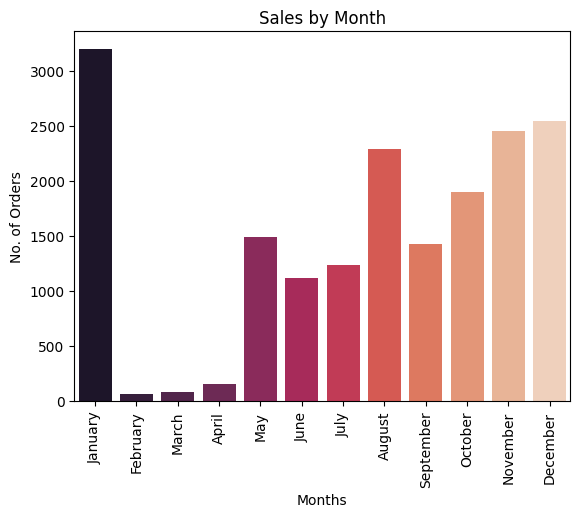

In [44]:
sns.barplot(data=monthly_sales,x='Month',y='Order Status',palette='rocket')
plt.xticks(rotation=90)
plt.title("Sales by Month")
plt.xlabel("Months")
plt.ylabel("No. of Orders")

So, January has the highest number of sales followed by december. Maybe, it's because of people wanting to develop good habits as part of their New year wishes. :P

Now let's find out if there is any trend of orders w.r.t days.

In [45]:
books_data[books_data['Order Status']=='Completed'].groupby('Day')['Order Status'].count().reset_index()

,Day,Order Status
0,Fri,2683
1,Mon,2290
2,Sat,3966
3,Sun,3426
4,Thu,1813
5,Tue,1930
6,Wed,1840


Let's sort Days.

In [46]:
days_result=books_data[books_data['Order Status']=='Completed'].groupby('Day')['Order Status'].count()

In [47]:
sales_by_day = days_result.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

In [48]:
sales_by_day=sales_by_day.reset_index()

Text(0.5, 1.0, 'Sales w.r.t Days')

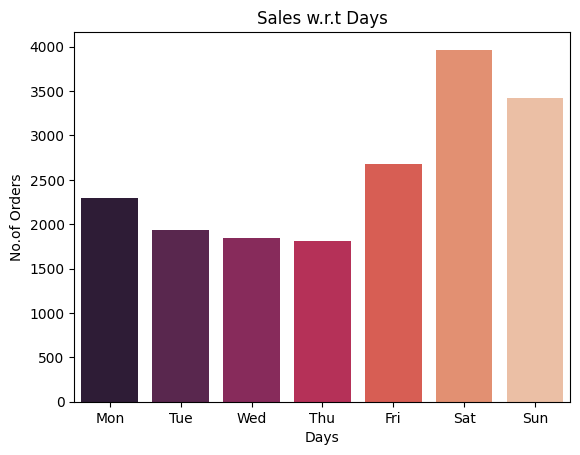

In [49]:
sns.barplot(data=sales_by_day, x='Day', y='Order Status',palette='rocket')
plt.xlabel("Days")
plt.ylabel("No.of Orders")
plt.title("Sales w.r.t Days")

Looking at the graph, Saturday has highest number of orders followed by Sunday. So, People tend to buy more books on weekends.

In [50]:
books_data.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Year,Month,Day
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,COD,2,200.0,2019,October,Thu
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,rawalpindi,COD,1,200.0,2019,October,Thu
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,hyderabad,COD,2,200.0,2019,October,Thu
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,rawalpindi,COD,1,200.0,2019,October,Thu
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,karachi,COD,1,200.0,2019,October,Thu


Let's look at cities with the highest books ordered.

In [51]:
books_data.groupby('City')['Total items'].sum().sort_values(ascending=False).reset_index().head(10)

,City,Total items
0,karachi,6157
1,lahore,5012
2,islamabad,2583
3,rawalpindi,1568
4,faisalabad,1259
5,multan,915
6,peshawar,897
7,dera ismail khan,707
8,sialkot,633
9,gujranwala,594


In [52]:
books_by_city=books_data.groupby('City')['Total items'].sum().sort_values(ascending=False).reset_index()

Lets plot a graph to better understand what's going on.

Text(0.5, 0, 'No. of Books')

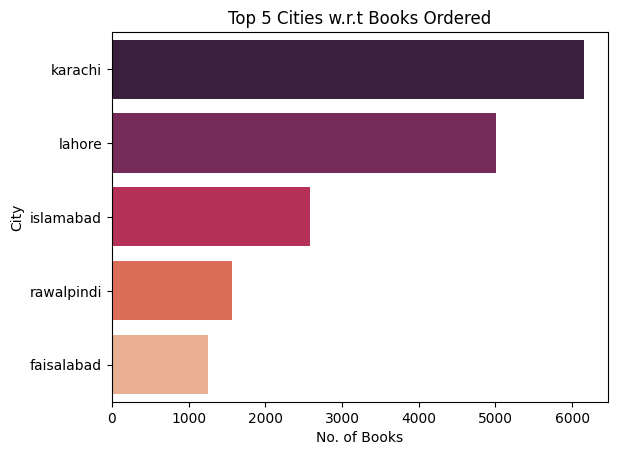

In [53]:
sns.barplot(data=books_by_city.head(5), x='Total items', y='City', palette='rocket')
plt.title("Top 5 Cities w.r.t Books Ordered")
plt.xlabel("No. of Books")

Uptil now we have analyzed following
* Top Cities with highest number of books ordered.
* Most in demand books
* Monthly Books Ordered
* Books Ordered w.r.t Days
* Order Status Frequency

Now lets see whch book is returned the most?

In [54]:
returned_books=book_df[book_df['Order Status']=='Returned'].groupby('Order Status')['Book Name'].value_counts().reset_index()

In [55]:
returned_books.head(10)

,Order Status,Book Name,count
0,Returned,انٹرنیٹ سے پیسہ کمائیں,483
1,Returned,Python Programming,187
2,Returned,"Blockchain, Cryptocurrency And Bitcoin",159
3,Returned,Artificial Intelligence,91
4,Returned,ڈیٹا سائنس,90
5,Returned,مشین لرننگ,69
6,Returned,Sukkur To Florida,45
7,Returned,Justju ka safar-1,41
8,Returned,Product Management,40
9,Returned,Introduction to Blockchain with Case Studies,39


<Axes: xlabel='count', ylabel='Book Name'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH G

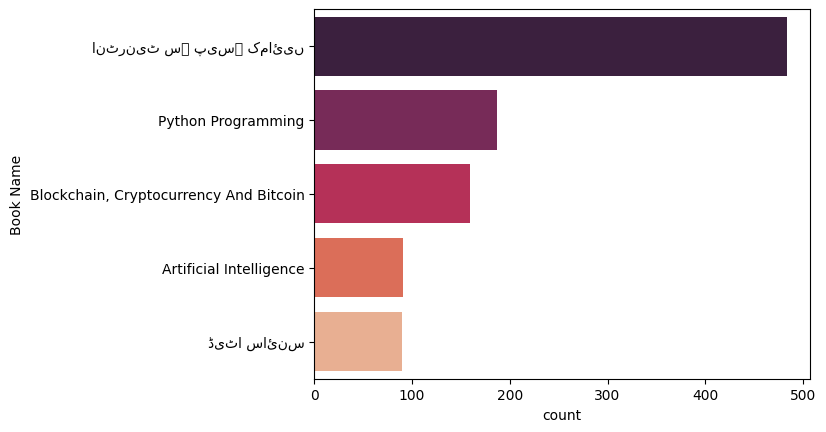

In [56]:
#using seaborn
sns.barplot(data=returned_books.head(5), x='count', y='Book Name', palette='rocket')

<BarContainer object of 5 artists>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning:

Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning:

Matplotlib currently does not support Arabic natively.

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning:

Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Matplotlib currently does not support Arabic natively.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.



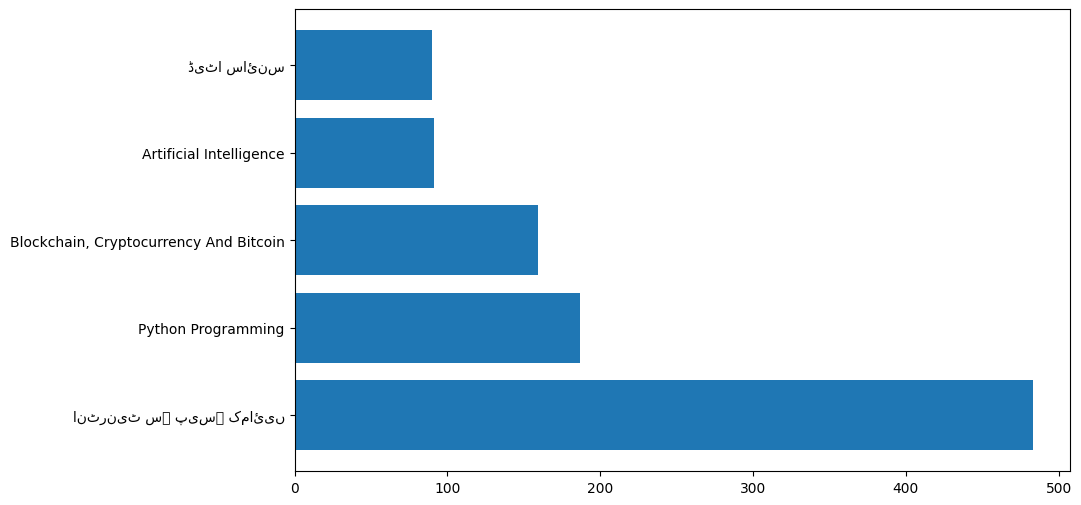

In [74]:
#using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(returned_books['Book Name'].head(),returned_books['count'].head())

In [73]:
#using plotly express
import plotly.express as px
px.bar(returned_books.head(5), x='count', y='Book Name',text='count')


So, plotly is better option when you have different languages in your dataset.

So, It comes out that the most returned book is انٹرنیٹ سے پیسہ کمائیں followed by Python Programming. I wonder why people are ordering Python Programming book to learn python!! They must be spending time on laptop/computer to learn it.  

Now, let's find out the percentage of returned books w.r.t. the books delivered.

In [78]:
delivered_books=book_df[book_df['Order Status']=='Completed'].groupby('Order Status')['Book Name'].value_counts().reset_index()

In [108]:
returned_counts = book_df[book_df['Order Status'] == 'Returned']['Book Name'].value_counts()
completed_counts = book_df[book_df['Order Status'] == 'Completed']['Book Name'].value_counts()

percentage_returned = ((returned_counts / completed_counts) * 100).fillna(0).reset_index()
percentage_returned[(percentage_returned['count']<=100) & (percentage_returned['count']!=0)]

,Book Name,count
1,(C++),5.691057
3,100 Azeem Musliman,33.333333
15,1815 KA HIJAZ MUQADAS,7.142857
16,1984 - English,21.428571
17,1984 - URDU TRANSLATION,11.363636
...,...,...
1714,فقہ عمر,14.285714
1722,مشین لرننگ,8.880309
1732,نفسیات کے معمار,33.333333
1739,پارلیمنٹ میں قادیانی شکست,25.000000


In [90]:
book_df[book_df['Book Name']=='Stoner']

,Order Number,Book Name,Order Status
22420,64885,Stoner,Returned
22475,64886,Stoner,Returned
22530,64887,Stoner,Returned
22585,64888,Stoner,Completed


In [94]:
books_data[books_data['Order Number']==64888]

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Year,Month,Day
15096,64888,Completed,Product Management/انٹرنیٹ سے پیسہ کمائیں/(C++...,2020-12-14 17:21:00,islamabad,COD,56,401.0,2020,December,Mon
